In [4]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import numpy as np
import timeit
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\college\\minor project ana\\crime_dataset_india24.csv")

df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


(   Report Number     Date Reported Date of Occurrence Time of Occurrence  \
 0              1  02-01-2020 00:00   01-01-2020 00:00   01-01-2020 01:11   
 1              2  01-01-2020 19:00   01-01-2020 01:00   01-01-2020 06:26   
 2              3  02-01-2020 05:00   01-01-2020 02:00   01-01-2020 14:30   
 3              4  01-01-2020 05:00   01-01-2020 03:00   01-01-2020 14:46   
 4              5  01-01-2020 21:00   01-01-2020 04:00   01-01-2020 16:51   
 
         City  Crime Code Crime Description  Victim Age Victim Gender  \
 0  Ahmedabad         576    IDENTITY THEFT          16             M   
 1    Chennai         128          HOMICIDE          37             M   
 2   Ludhiana         271        KIDNAPPING          48             F   
 3       Pune         170          BURGLARY          49             F   
 4       Pune         421         VANDALISM          30             F   
 
     Weapon Used   Crime Domain  Police Deployed Case Closed  Date Case Closed  
 0  Blunt Objec

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns
columns_to_drop = ['Report Number', 'Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'Crime Description']
df_cleaned = df.drop(columns=columns_to_drop)

# Handle missing values
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':  # For categorical columns
        df_cleaned[column] = df_cleaned[column].fillna('Unknown')
    else:  # For numerical columns
        df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].median())

# Encode categorical variables
label_encoders = {}
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Features and target
X = df_cleaned.drop(columns=['Crime Domain'])
y = df_cleaned['Crime Domain']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (28112, 8) (28112,)
Test set shape: (12048, 8) (12048,)


In [ ]:
grouped_crimes = df.groupby('Crime Description').size().reset_index(name='Count')

# Sort the results
sorted_crime_counts = grouped_crimes.sort_values(by='Count', ascending=False)

# Display the results
print(sorted_crime_counts)

      Crime Description  Count
2              BURGLARY   1980
19            VANDALISM   1975
9                 FRAUD   1965
5     DOMESTIC VIOLENCE   1932
8       FIREARM OFFENSE   1931
15              ROBBERY   1928
13           KIDNAPPING   1920
11       IDENTITY THEFT   1918
16       SEXUAL ASSAULT   1917
18    TRAFFIC VIOLATION   1915
1               ASSAULT   1915
14  PUBLIC INTOXICATION   1912
10             HOMICIDE   1909
4            CYBERCRIME   1899
12   ILLEGAL POSSESSION   1895
0                 ARSON   1894
6          DRUG OFFENSE   1890
7             EXTORTION   1873
3        COUNTERFEITING   1871
20     VEHICLE - STOLEN   1862
17          SHOPLIFTING   1859


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



# Check the first few rows to understand the structure
print(df.head())

# Convert the date column to datetime format
# Replace 'Date' with the actual name of your date column
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce')

# Check for any rows that could not be converted
print("Rows with NaT in the Date column:", df[df['Date of Occurrence'].isna()])

# Drop rows where the date conversion failed
df = df.dropna(subset=['Date of Occurrence'])

# Extract features from the date
df['Month'] = df['Date of Occurrence'].dt.month
df['Day'] = df['Date of Occurrence'].dt.day
df['Hour'] = df['Date of Occurrence'].dt.hour

# Optionally drop the original date column if it's no longer needed
# df = df.drop(columns=['Date'])

# Preprocess the data (example: encoding categorical variables)
df['Crime Description'] = df['Crime Description'].astype('category').cat.codes

# Define features and target variable
X = df[['Crime Description', 'Month', 'Day', 'Hour']]  # Example features
y = df['Crime Description']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

   Report Number     Date Reported Date of Occurrence Time of Occurrence  \
0              1  02-01-2020 00:00   01-01-2020 00:00   01-01-2020 01:11   
1              2  01-01-2020 19:00   01-01-2020 01:00   01-01-2020 06:26   
2              3  02-01-2020 05:00   01-01-2020 02:00   01-01-2020 14:30   
3              4  01-01-2020 05:00   01-01-2020 03:00   01-01-2020 14:46   
4              5  01-01-2020 21:00   01-01-2020 04:00   01-01-2020 16:51   

        City  Crime Code Crime Description  Victim Age Victim Gender  \
0  Ahmedabad         576    IDENTITY THEFT          16             M   
1    Chennai         128          HOMICIDE          37             M   
2   Ludhiana         271        KIDNAPPING          48             F   
3       Pune         170          BURGLARY          49             F   
4       Pune         421         VANDALISM          30             F   

    Weapon Used   Crime Domain  Police Deployed Case Closed  Date Case Closed  
0  Blunt Object  Violent Crime

In [ ]:

df['Crime Description'] = df['Crime Description'].astype('category').cat.codes
df['Date of Occurrence'] = df['Date of Occurrence'].astype('category').cat.codes
df['Time of Occurrence'] = df['Time of Occurrence'].astype('category').cat.codes
X = df[['Crime Description','Date of Occurrence','Time of Occurrence' ]]  # Example features
y = df['Crime Domain']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 735    2    0    0]
 [   0 4576    0    4]
 [   0    4  389    0]
 [   0    0    0 2322]]
                  precision    recall  f1-score   support

   Fire Accident       1.00      1.00      1.00       737
     Other Crime       1.00      1.00      1.00      4580
Traffic Fatality       1.00      0.99      0.99       393
   Violent Crime       1.00      1.00      1.00      2322

        accuracy                           1.00      8032
       macro avg       1.00      1.00      1.00      8032
    weighted avg       1.00      1.00      1.00      8032



In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Crime Description' and 'Victim Gender' and calculate counts
grouped_gender_crimes = df.groupby(['Crime Description', 'Victim Gender']).size().reset_index(name='Count')

# Pivot data to create a format suitable for stacked bar chart
pivot_data = grouped_gender_crimes.pivot(index='Crime Description', columns='Victim Gender', values='Count').fillna(0)

# Calculate the percentage of each gender per crime
pivot_data_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart
ax = pivot_data_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'pink','orange '])

# Add labels and title
plt.title("Percentage of Crimes by Gender for Each Crime Description")
plt.xlabel("Crime Description")
plt.ylabel("Percentage (%)")
plt.legend(title='Victim Gender', loc='upper right')

# Adjust x-axis tick labels to show crime names
ax.set_xticks(range(len(pivot_data_percentage.index)))
ax.set_xticklabels(pivot_data_percentage.index, rotation=45, ha='right', fontsize=9)


# Improve layout
plt.tight_layout()

# Show plot
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

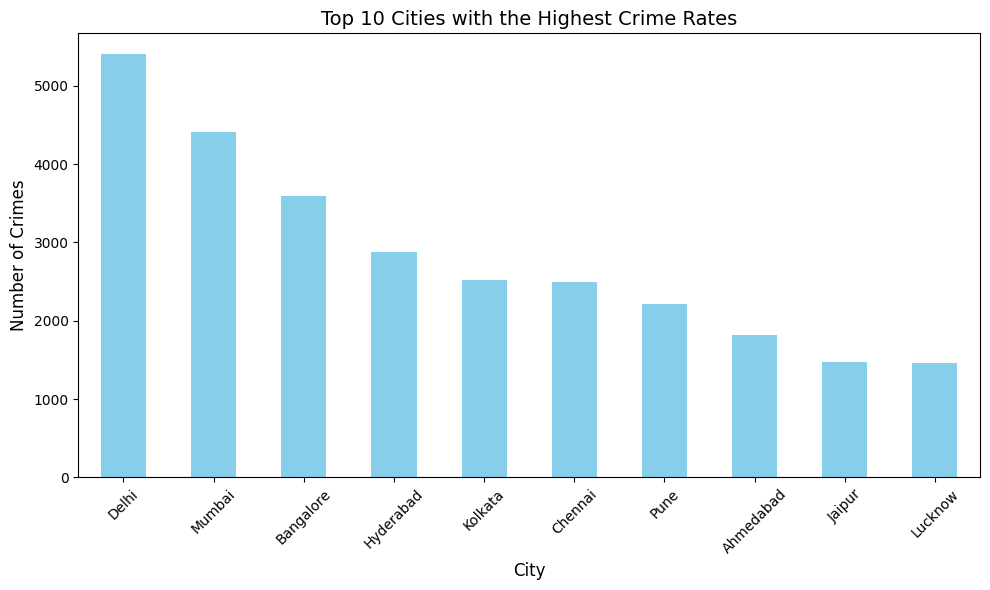

In [ ]:
# Group data by city
city_crime_count = df['City'].value_counts().head(10)  # Top 10 cities

# Plot
plt.figure(figsize=(10, 6))
city_crime_count.plot(kind='bar', color='skyblue')
plt.title("Top 10 Cities with the Highest Crime Rates", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

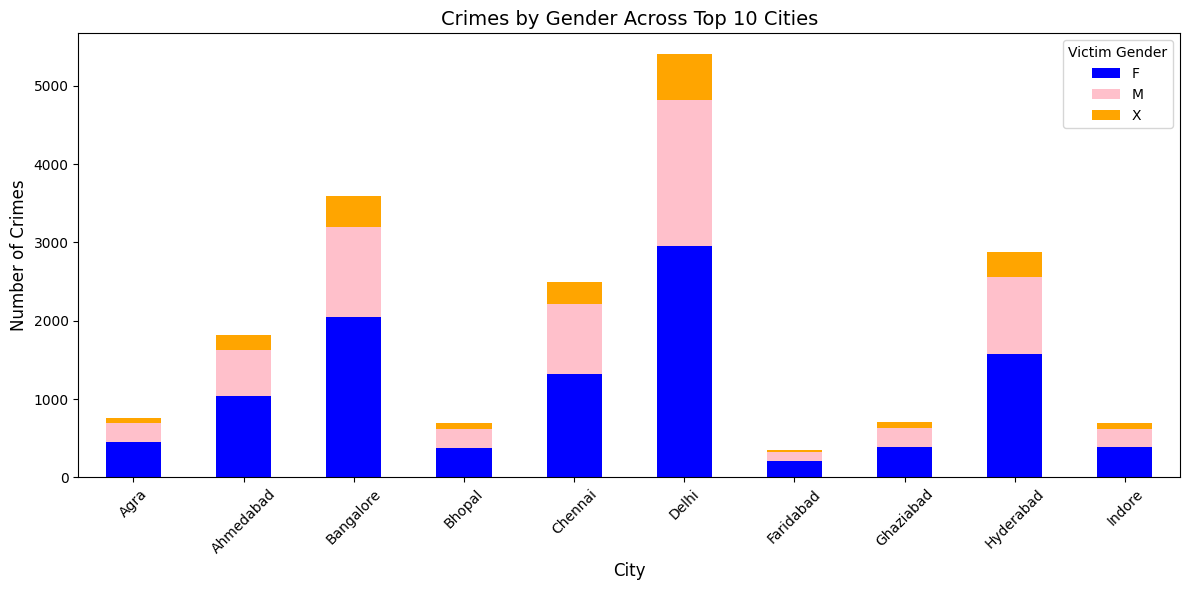

In [ ]:
# Group by city and victim gender
gender_city_crime = df.groupby(['City', 'Victim Gender']).size().unstack(fill_value=0).head(10)

# Plot
gender_city_crime.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'pink','orange'])
plt.title("Crimes by Gender Across Top 10 Cities", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.legend(title="Victim Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_30744\3481502136.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], errors='coerce')


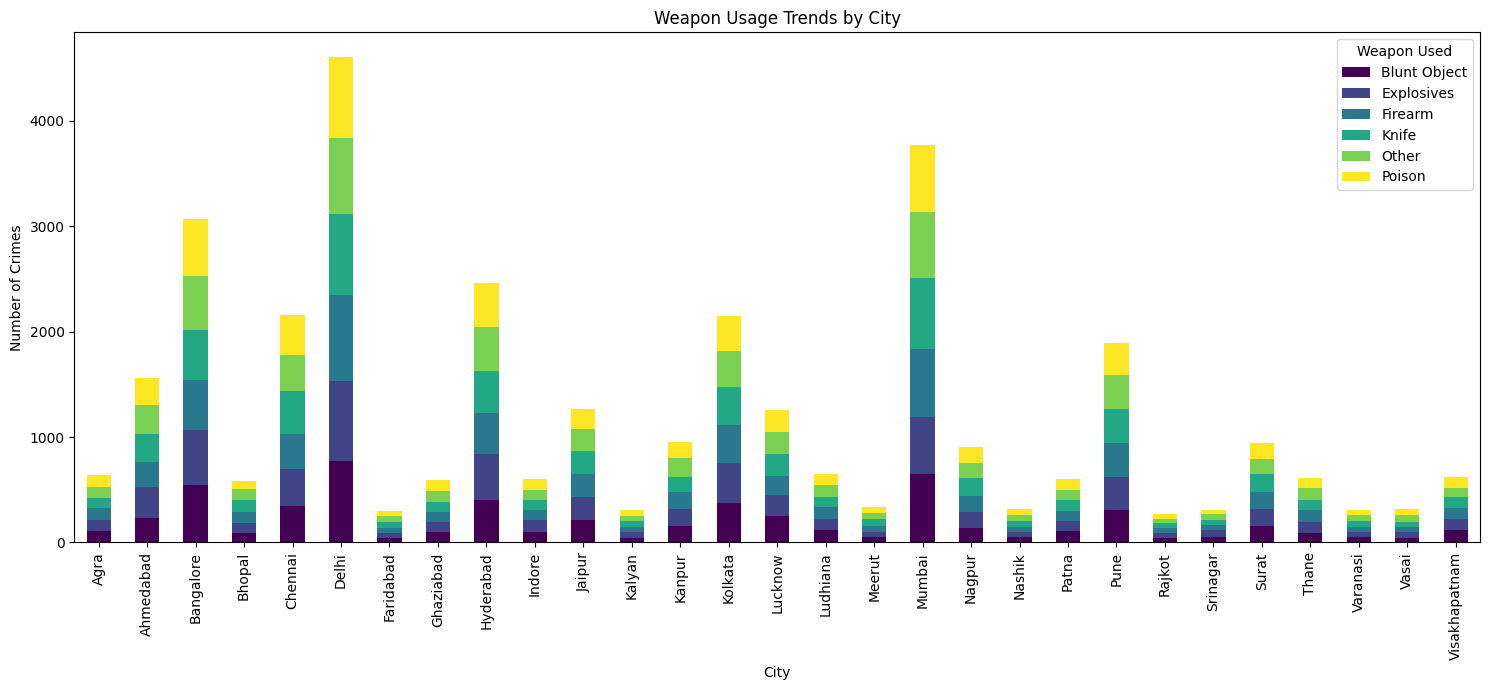

In [ ]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce')
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce')
df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], errors='coerce')

# Analysis 1: Weapon Usage Trends by City
weapon_city_trends = df.groupby(['City', 'Weapon Used']).size().unstack(fill_value=0)
weapon_city_trends.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='viridis')
plt.title('Weapon Usage Trends by City')
plt.ylabel('Number of Crimes')
plt.xlabel('City')
plt.legend(title='Weapon Used')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Time of Occurrence' to hours, handling errors
df['Hour of Occurrence'] = pd.to_datetime(df['Time of Occurrence'], errors='coerce').dt.hour

# Drop rows with missing or invalid 'Hour of Occurrence'
df = df.dropna(subset=['Hour of Occurrence'])

# Group the data by 'Hour of Occurrence' and 'Crime Domain'
time_analysis = df.groupby(['Hour of Occurrence', 'Crime Domain']).size().unstack(fill_value=0)

# Ensure the DataFrame is not empty
if not time_analysis.empty:
    # Plotting
    ax = time_analysis.plot(kind='line', figsize=(15, 7), marker='o')

    # Set x-axis values explicitly
    ax.set_xticks(range(24))
    ax.set_xticklabels([f"{hour}:00" for hour in range(24)], rotation=45)

    # Labels and title
    plt.title('Crime Occurrence by Hour and Domain')
    plt.ylabel('Number of Crimes')
    plt.xlabel('Hour of Day')
    plt.legend(title='Crime Domain', loc='upper right')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("No data available to plot.")


No data available to plot.


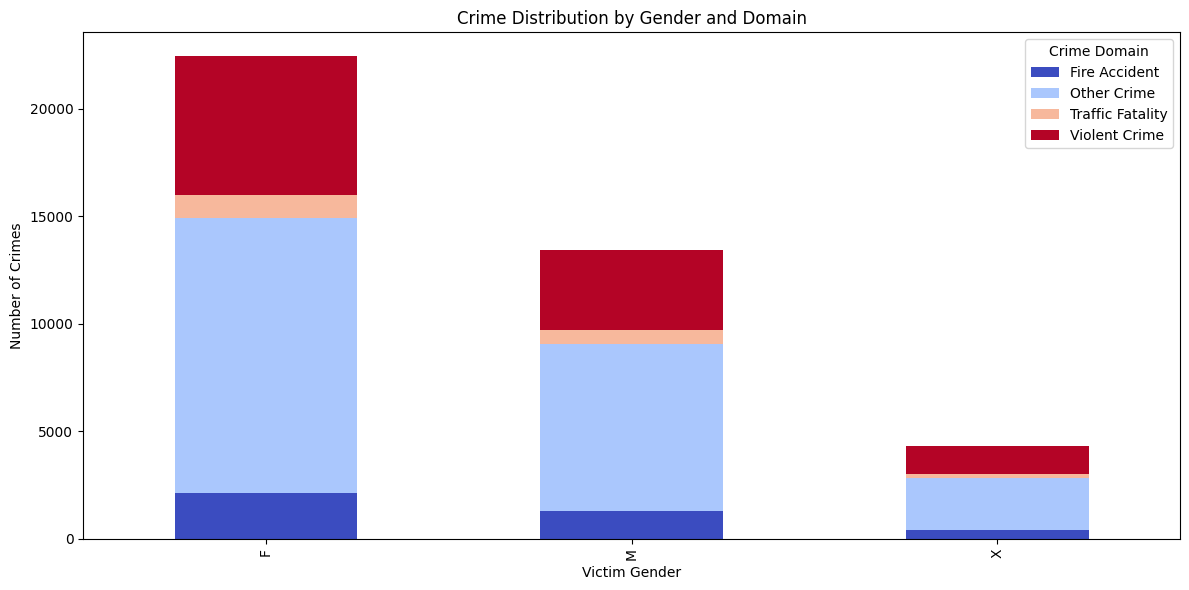

In [ ]:
age_gender_analysis = df.groupby(['Victim Gender', 'Crime Domain']).size().unstack(fill_value=0)
age_gender_analysis.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Crime Distribution by Gender and Domain')
plt.xlabel('Victim Gender')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Domain')
plt.tight_layout()
plt.show()

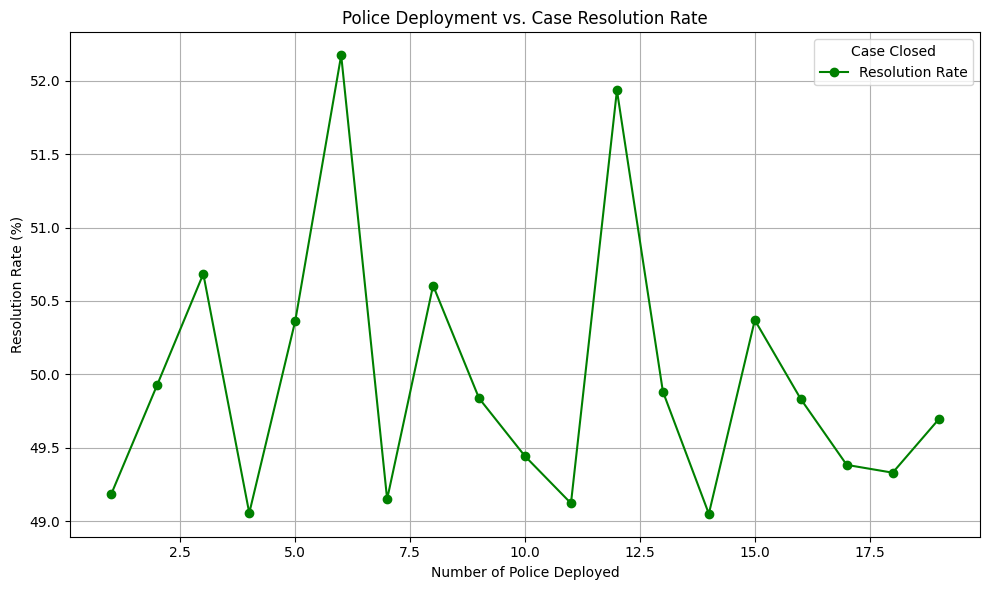

In [ ]:
police_efficiency = df.groupby(['Police Deployed', 'Case Closed']).size().unstack(fill_value=0)
police_efficiency['Resolution Rate'] = police_efficiency['Yes'] / (police_efficiency['Yes'] + police_efficiency['No']) * 100
police_efficiency[['Resolution Rate']].plot(kind='line', figsize=(10, 6), color='green', marker='o')
plt.title('Police Deployment vs. Case Resolution Rate')
plt.xlabel('Number of Police Deployed')
plt.ylabel('Resolution Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()